# project 3:search relevance prediction 

## step 1: import data

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy.stats import norm,skew
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer 


In [4]:
### import train and test set and product description data

In [5]:
df_train = pd.read_csv('C:/Users/wuhao/Desktop/springboard/capstone_three/train.csv', encoding ="ISO-8859-1")
df_test = pd.read_csv('C:/Users/wuhao/Desktop/springboard/capstone_three/test.csv', encoding ="ISO-8859-1")

In [6]:
df_desc = pd.read_csv('C:/Users/wuhao/Desktop/springboard/capstone_three/product_descriptions.csv')

In [7]:
df_train.head(5)

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [8]:
df_desc.head(5)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [9]:
df_all = pd.concat((df_train,df_test),axis = 0, ignore_index = True)

In [10]:
df_all.head(5)

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [11]:
df_all = pd.merge(df_all, df_desc, how = "left", on = 'product_uid')

In [12]:
df_all.head(5)

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...


## step 2: data preprocessing and wrangling

In [13]:
### text normalization, here we use stemmer first

In [14]:
stemmer = SnowballStemmer('english')
def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

In [15]:
### counter thew  numbers of a word occourred 

In [16]:
def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())

In [17]:
#apply this method to one column

In [18]:
df_all['search_term'] = df_all['search_term'].map(lambda x: str_stemmer(x))

In [19]:
df_all.head(5)

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angl bracket,3.00,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower onli faucet,2.67,Update your bathroom with the Delta Vero Singl...


In [20]:
#apply this method to all columns 

In [21]:
df_all['product_title'] = df_all['product_title'].map(lambda x:str_stemmer(x))

In [22]:
df_all['product_description'] = df_all['product_description'].map(lambda x:str_stemmer(x))

In [23]:
df_all.head(5)

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,simpson strong-ti 12-gaug angl,angl bracket,3.00,"not onli do angl make joint stronger, they als..."
1,3,100001,simpson strong-ti 12-gaug angl,l bracket,2.50,"not onli do angl make joint stronger, they als..."
2,9,100002,behr premium textur deckov 1-gal. #sc-141 tugb...,deck over,3.00,behr premium textur deckov is an innov solid c...
3,16,100005,delta vero 1-handl shower onli faucet trim kit...,rain shower head,2.33,updat your bathroom with the delta vero single...
4,17,100005,delta vero 1-handl shower onli faucet trim kit...,shower onli faucet,2.67,updat your bathroom with the delta vero single...


## step 3: Exploratory Data Analysis 

In [24]:
# we want to check any missing data or outliers for any columns

In [25]:
df_all_null = (df_all.isnull().sum()/len(df_all))*100
df_all_null

id                      0.000000
product_uid             0.000000
product_title           0.000000
search_term             0.000000
relevance              69.236169
product_description     0.000000
dtype: float64

In [26]:
missing_data = pd.DataFrame({'Miss_data_Ratio':df_all_null})
missing_data.head(20)

,Miss_data_Ratio
id,0.000000
product_uid,0.000000
product_title,0.000000
search_term,0.000000
relevance,69.236169
product_description,0.000000


### no worry, I check the test set, there is no relvevance cloumns in that set, so this missing ratio is "come" from the test set.Anythinelse is okay.

In [27]:
#we want to check the distribution of the relevance score

In [46]:
relevance = df_train.relevance.values

In [47]:
relevance

array([3.  , 2.5 , 3.  , ..., 2.33, 3.  , 2.33])

(array([2.1050e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 3.0060e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 6.7800e+03, 0.0000e+00,
        9.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1730e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1000e+01, 1.6060e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.9000e+01, 0.0000e+00, 0.0000e+00, 1.5202e+04, 0.0000e+00,
        1.1000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9125e+04]),
 array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
        1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05,
        2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 ,
        2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  ]),
 <BarContainer object of 40 artists>)

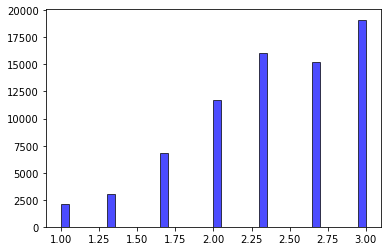

In [33]:
plt.hist(relevance, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)

In [ ]:
# from here we might have concluded that the revelvance score are discrete value

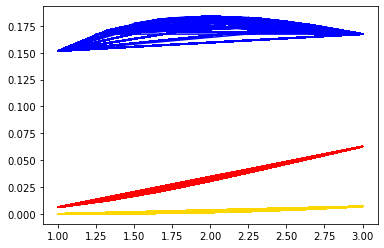

In [39]:
from scipy.stats import chi2
plt.plot(relevance,chi2.pdf(relevance, df = 4),color ='blue')
plt.plot(relevance,chi2.pdf(relevance, df = 8),color ='red')
plt.plot(relevance,chi2.pdf(relevance, df = 12),color ='gold')

<AxesSubplot:xlabel='relevance', ylabel='product_uid'>

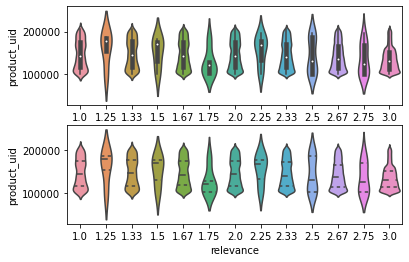

In [61]:
fig,axes = plt.subplots(2,1)
sns.violinplot(x = "relevance",y = "product_uid",data=df_all, inner = "box", ax = axes[0])
sns.violinplot(x = "relevance",y = "product_uid",data=df_all, inner = "quartile", ax = axes[1])
#sns.violinplot(x = "relevance",y = "product_uid",data=df_all, inner = "point", ax = axes[1,0])
#sns.violinplot(x = "relevance",y = "product_uid",data=df_all, inner = "stick", ax = axes[1,1])

<AxesSubplot:xlabel='relevance', ylabel='product_uid'>

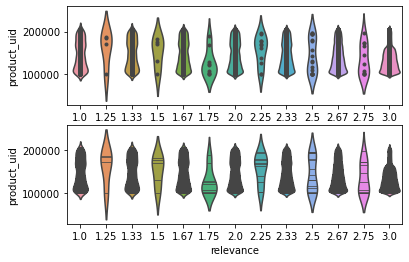

In [62]:
fig,axes = plt.subplots(2,1)
sns.violinplot(x = "relevance",y = "product_uid",data=df_all, inner = "point", ax = axes[0])
sns.violinplot(x = "relevance",y = "product_uid",data=df_all, inner = "stick", ax = axes[1])

In [49]:
product_uid = df_train.product_uid.values

In [ ]:
x = "relevance",y = "product_uid"

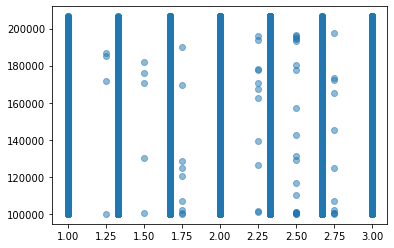

In [52]:
plt.scatter(relevance, product_uid, alpha = 0.5)
plt.show()

In [ ]:
# now we can concluded that the scores are very discrete.

In [54]:
df_all.relevance.value_counts()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

In [ ]:
### most of them are drop in 2~3 which means most of the releveance score is closed to the 3(most accuracy)

## step 4: feature engineering

### create some new numeric features for future use 

In [23]:
# import levenshtein distance to measure the numeric distance between search term and product title; search and product description

In [36]:
import Levenshtein
Levenshtein.ratio('hello','hello world')

0.625

In [37]:
df_all['dist_in_title'] =df_all.apply(lambda x:Levenshtein.ratio(x['search_term'], x["product_title"]), axis = 1)

In [38]:
df_all['dist_in_desc'] = df_all.apply(lambda x:Levenshtein.ratio(x['search_term'],x['product_description']), axis=1)

In [39]:
# create a new column which merge the product_ title and product description for construct a corpus

In [40]:
df_all['all_texts']=df_all['product_title'] + ' . ' + df_all['product_description'] + ' . '

In [41]:
df_all['all_texts'][:5]

0    simpson strong-ti 12-gaug angl . not onli do a...
1    simpson strong-ti 12-gaug angl . not onli do a...
2    behr premium textur deckov 1-gal. #sc-141 tugb...
3    delta vero 1-handl shower onli faucet trim kit...
4    delta vero 1-handl shower onli faucet trim kit...
Name: all_texts, dtype: object

In [42]:
# import gensim for tokenize and dictionary 

In [43]:
from gensim.utils import tokenize
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(list(tokenize(x, errors = 'ignore')) for x in df_all['all_texts'].values)
print(dictionary)

Dictionary(221877 unique tokens: ['a', 'against', 'alonehelp', 'also', 'and']...)


In [44]:
### scan the dictionary and transfer this dictionary to bags of words

In [45]:
class MyCorpus(object):
    def __iter__(self):
        for x in df_all['all_texts'].values:
            yield dictionary.doc2bow(list(tokenize(x, errors='ignore')))
            
            
corpus = MyCorpus()

In [1]:
print(corpus)

NameError: name 'corpus' is not defined

In [54]:
print(df_all.info)

<bound method DataFrame.info of             id  product_uid  \
0            2       100001   
1            3       100001   
2            9       100002   
3           16       100005   
4           17       100005   
...        ...          ...   
240755  240756       224424   
240756  240757       224425   
240757  240758       224426   
240758  240759       224427   
240759  240760       224428   

                                            product_title  \
0                          simpson strong-ti 12-gaug angl   
1                          simpson strong-ti 12-gaug angl   
2       behr premium textur deckov 1-gal. #sc-141 tugb...   
3       delta vero 1-handl shower onli faucet trim kit...   
4       delta vero 1-handl shower onli faucet trim kit...   
...                                                   ...   
240755  stufurhom norma 24 in. w x 16 in. d x 34 in. h...   
240756  home decor collect 49 in. d alessandro spicebe...   
240757  simpson strong-ti hb 3-1/2 x 14 in. to

In [46]:
# import TF-iDF and apply this package to the dictionary

In [47]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)

In [48]:
tfidf[dictionary.doc2bow(list(tokenize('hello world, good morning', errors='ignore')))]

[(1001, 0.2947139124944075),
 (3433, 0.28760732706613895),
 (33767, 0.6587176730120703),
 (35250, 0.6296957697663794)]

### need to build a function to standardize the size of the vectors, as different setence has different size, we need to fill all the vectors with 0s -- scale standardization step

In [37]:
from gensim.similarities import MatrixSimilarity

def to_tfidf(text):
    res = tfidf[dictionary.doc2bow(list(tokenize(text, errors = 'ignore')))]
    return res

def cos_sim(text1, text2):
    tfidf1 = to_tfidf(text1)
    tfidf2 = to_tfidf(text2)
    index = MatrixSimilarity([tfidf1],num_features=len(dictionary))
    sim = index[tfidf2]
    return float(sim[0])
    

In [38]:
## do a test for the function above

In [39]:
text1 = 'hello world'
text2 = 'hello from the other side'
cos_sim(text1, text2)

0.8566456437110901

In [40]:
#apply the function above to calculate the similarities of the three columns 

SyntaxError: invalid syntax (<ipython-input-40-b7e53b5213c0>, line 1)

In [41]:
df_all['tfidf_cos_sim_in_title'] = df_all.apply(lambda x: cos_sim(x['search_term'], x['product_title']), axis=1)

In [42]:
df_all['tfidf_cos_sim_in_title'][:5]

0    0.274539
1    0.000000
2    0.000000
3    0.133577
4    0.397320
Name: tfidf_cos_sim_in_title, dtype: float64

In [43]:
df_all['tfidf_cos_sim_in_desc'] = df_all.apply(lambda x: cos_sim(x['search_term'], x['product_description']), axis=1)

In [44]:
df_all['tfidf_cos_sim_in_desc'][:5]

0    0.182836
1    0.000000
2    0.053455
3    0.043712
4    0.098485
Name: tfidf_cos_sim_in_desc, dtype: float64

In [45]:
# drop all the non-numerical features for modeling

In [46]:
df_all.drop(['search_term','product_title','product_description','all_texts'], inplace = True, axis =1 )

In [47]:
df_all.head()

,id,product_uid,relevance,dist_in_title,dist_in_desc,tfidf_cos_sim_in_title,tfidf_cos_sim_in_desc
0,2,100001,3.00,0.190476,0.030418,0.274539,0.182836
1,3,100001,2.50,0.153846,0.022901,0.000000,0.000000
2,9,100002,3.00,0.175000,0.017875,0.000000,0.053455
3,16,100005,2.33,0.326087,0.048632,0.133577,0.043712
4,17,100005,2.67,0.382979,0.054545,0.397320,0.098485


In [48]:
#in sum, right now ,we have four new columns which derived from the old columns, we use two methods which are Levenshtein and tfidf

## step 4: spilit the data set back to train & test set

In [49]:
df_train = df_all.loc[df_train.index]
df_test = df_all.loc[df_test.index]

In [50]:
test_ids = df_test['id']

In [51]:
y_train = df_train['relevance'].values

In [52]:
X_train = df_train.drop(['id','relevance'],axis=1).values
X_test = df_test.drop(['id','relevance'],axis=1).values

# step 5: Model selection 

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [54]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import warnings   

In [55]:
params = [1,3,5,6,7,8,9,10]
rfr_test_scores = []


for param in params:
    rfr = RandomForestRegressor(n_estimators=30, max_depth=param)
    test_score = np.sqrt(-cross_val_score(rfr, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    rfr_test_scores.append(np.mean(test_score))

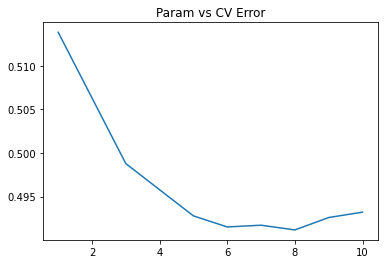

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, rfr_test_scores)
plt.title("Param vs CV Error");

In [57]:
print(rfr_test_scores)

[0.5138314108832868, 0.4987813185023916, 0.4927863178745923, 0.4915212314009955, 0.49171811871436855, 0.49118056549639794, 0.49260115763408513, 0.49321737945688493]


In [58]:
params = [1,3,5,6,7,8,9,10]
gbr_test_scores = []

#X_train = X_train.fillna(X_train.mean(),inplace = True)
#y_train = y_train.fillna(y_train.mean(),inplace = True)
for param in params:
    gbr = GradientBoostingRegressor(n_estimators=30, max_depth=param)
    test_score = np.sqrt(-cross_val_score(gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    gbr_test_scores.append(np.mean(test_score))

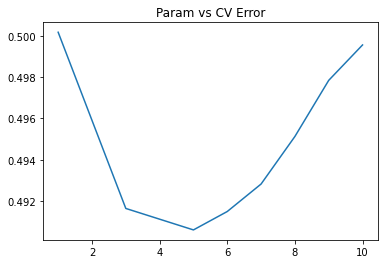

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, gbr_test_scores)
plt.title("Param vs CV Error");

In [60]:
print(gbr_test_scores)

[0.5001868372738553, 0.49163155567731753, 0.49058901121098275, 0.4914825614962283, 0.4928170074675302, 0.49512607268956277, 0.49785071789134666, 0.4995697155664969]


In [61]:
params = [1,3,5,6,7,8,9,10]
xgb_test_scores = []

#X_train = X_train.fillna(X_train.mean(),inplace = True)
#y_train = y_train.fillna(y_train.mean(),inplace = True)
for param in params:
    xgb = XGBRegressor(n_estimators=30, max_depth=param)
    test_score = np.sqrt(-cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    xgb_test_scores.append(np.mean(test_score))

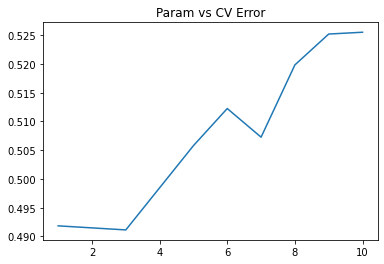

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, xgb_test_scores)
plt.title("Param vs CV Error");

In [63]:
print(xgb_test_scores)

[0.49184231507761156, 0.4911361924114937, 0.5057970280934803, 0.5122533269808635, 0.5072721970307731, 0.5198433254873253, 0.5252132355807195, 0.525525518766657]


# step 6: Choose the best model and caculate the result

In [64]:
rfr = RandomForestRegressor(n_estimators=30, max_depth=6)

In [65]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=30)

In [66]:
y_pred = rfr.predict(X_test)

In [67]:
pd.DataFrame({"id": test_ids, "relevance": y_pred}).to_csv('submission.csv',index=False)

In [70]:
y_pred

array([2.45651444, 2.0455801 , 2.20320464, ..., 2.59010177, 2.47996452,
       2.27970175])